In [1]:
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [2]:
import networkx as nx

In [3]:
orders = pd.read_csv('Online Retail.txt', sep='\t', encoding='cp1251')

In [4]:
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


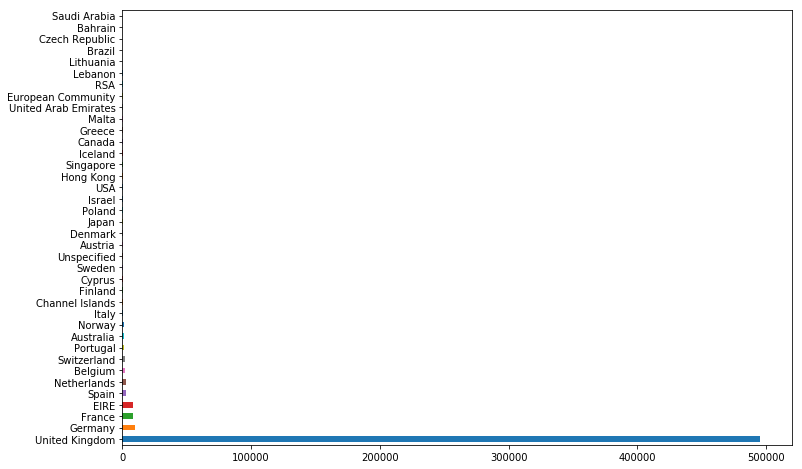

In [5]:
plt.figure(figsize=(12,8))
orders['Country'].value_counts().plot.barh()
plt.show()

In [6]:
orders['Description'] = orders['Description'].str.strip()
orders.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [7]:
orders['InvoiceNo'] = orders['InvoiceNo'].astype('str')
orders = orders[~orders['InvoiceNo'].str.contains('C')]

In [8]:
basket = orders[orders['Country'] =="France"]\
          .groupby(['InvoiceNo', 'Description'])['Quantity']\
          .sum().unstack().reset_index().fillna(0)\
          .set_index('InvoiceNo')

In [9]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [11]:
basket_sets = basket.applymap(encode_units)

In [12]:
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [13]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [14]:
orders.shape

(532621, 8)

In [15]:
frequent_itemsets.shape

(113, 2)

In [16]:
# Create the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedants', 'consequents','support', 'confidence','lift']]
rules

,antecedants,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.073980,0.763158,7.478947
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.073980,0.725000,7.478947
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.079082,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.079082,0.815789,8.642959
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.073980,0.783784,7.681081
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.073980,0.725000,7.681081
6,(ALARM CLOCK BAKELIKE RED),(ROUND SNACK BOXES SET OF4 WOODLAND),0.051020,0.540541,3.417611
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(ALARM CLOCK BAKELIKE RED),0.051020,0.322581,3.417611
8,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.063776,0.925926,12.962963
9,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.063776,0.892857,12.962963


In [17]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedants,consequents,support,confidence,lift
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.079082,0.837838,8.642959
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.079082,0.815789,8.642959
8,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.063776,0.925926,12.962963
9,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.063776,0.892857,12.962963
38,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.051020,0.909091,14.254545
39,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.051020,0.800000,14.254545
65,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.102041,0.800000,6.030769
66,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.122449,0.960000,6.968889
67,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.122449,0.888889,6.968889
68,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",(ALARM CLOCK BAKELIKE PINK),0.063776,0.806452,7.903226


In [21]:
def create_a_graph(ruleset):
    G_ = nx.Graph()
    for index in ruleset.index:
        G_.add_edge(tuple(ruleset.at[index, 'antecedants']),\
                    tuple(ruleset.at[index, 'consequents']),\
                    weight=ruleset.at[index, 'confidence'] )
    return G_

In [22]:
G_france = create_a_graph(rules)

In [23]:
edge_size_list_f = []
for it in G_france.edges():
    edge_size_list_f.append(G_france.get_edge_data(*it)['weight']*10)

In [24]:
node_size_list_f = []
for it in G_france.adjacency():
    node_size_list_f.append(len(it[1])*100)


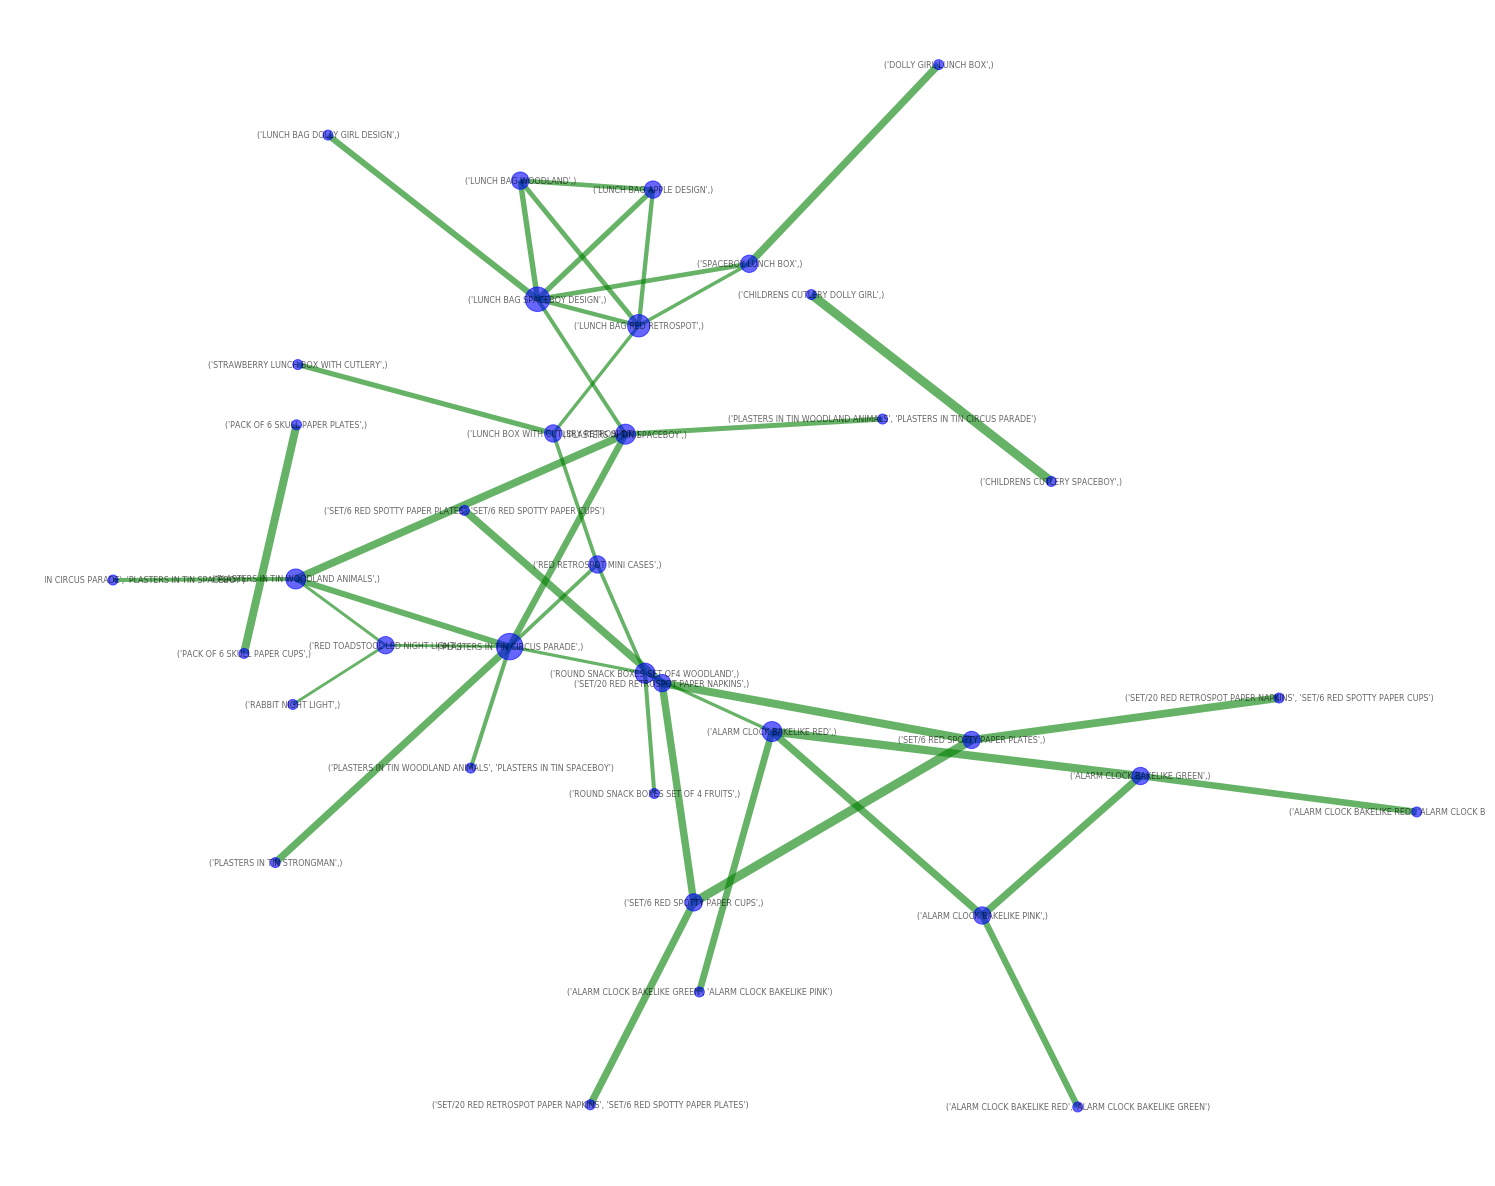

In [25]:
plt.figure(figsize =(20,16))
nx.draw_kamada_kawai(G_france, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list_f, width= edge_size_list_f)


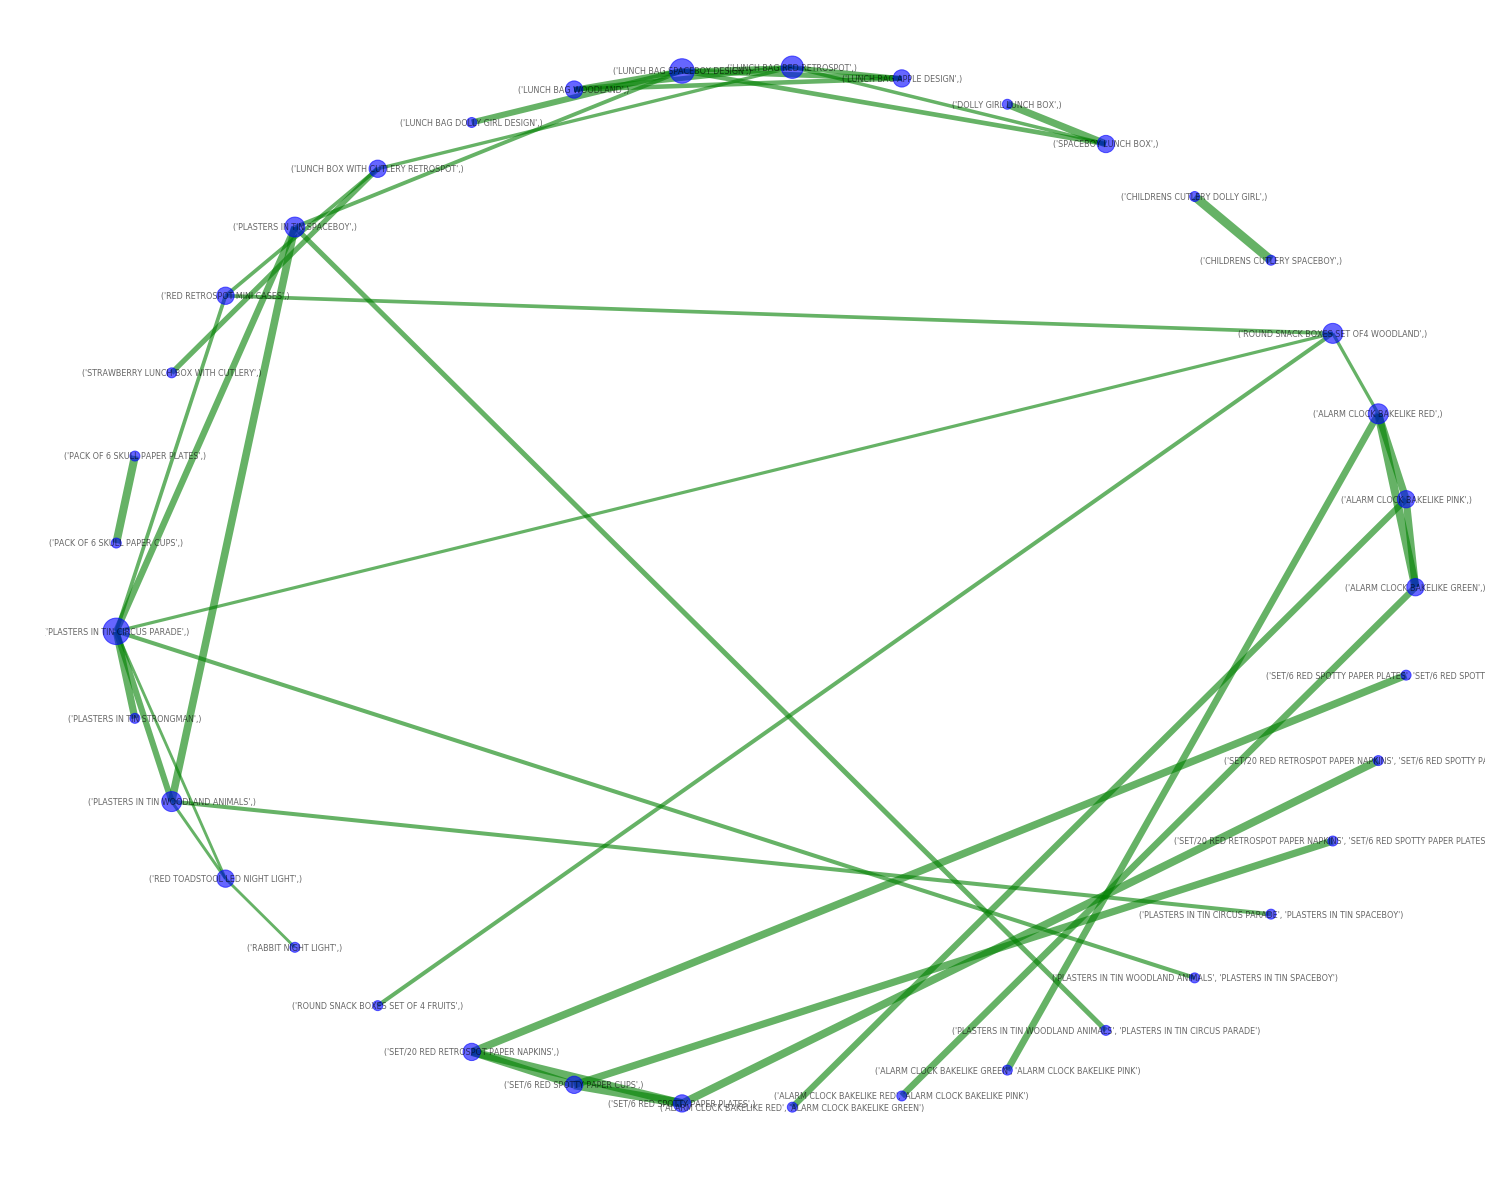

In [27]:
plt.figure(figsize =(20,16))
nx.draw_circular(G_france, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list_f, width= edge_size_list_f)

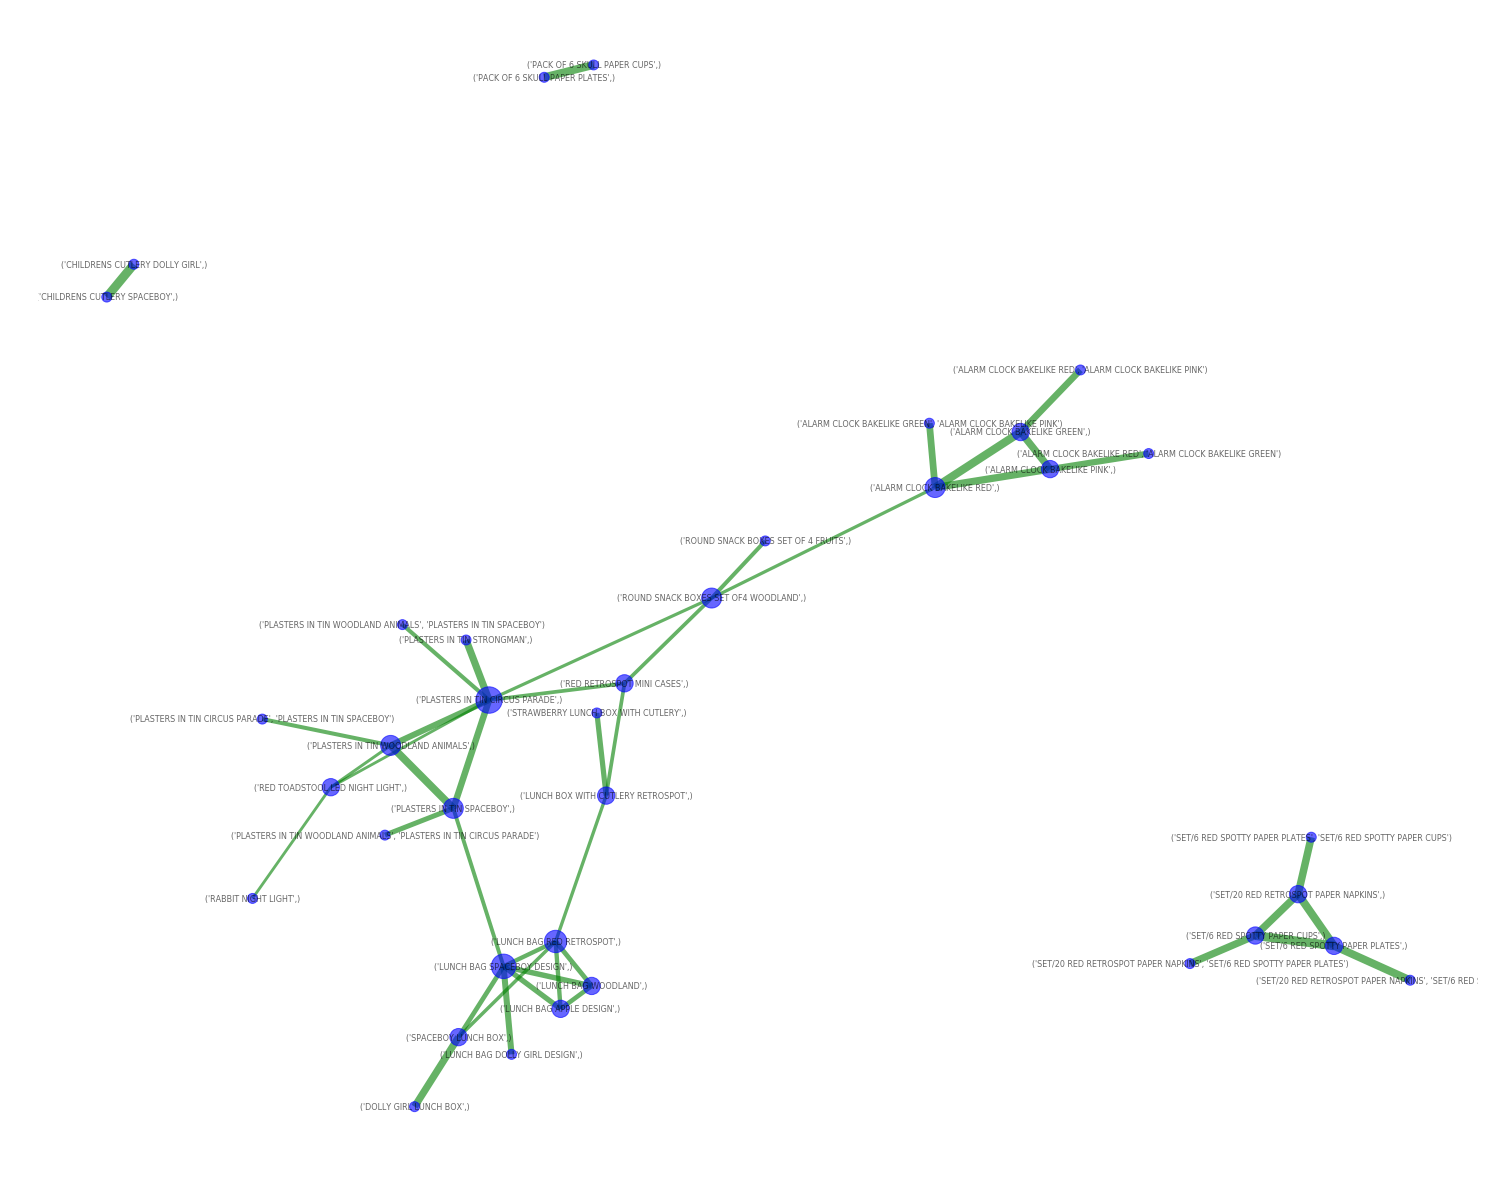

In [28]:
plt.figure(figsize =(20,16))
nx.draw_spring(G_france, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list_f, width= edge_size_list_f)

In [29]:
basket2 = orders[orders['Country'] =="United Kingdom"]\
          .groupby(['InvoiceNo', 'Description'])['Quantity']\
          .sum().unstack().reset_index().fillna(0)\
          .set_index('InvoiceNo')

In [30]:
basket_sets2 = basket2.applymap(encode_units)

In [31]:
basket_sets2.drop('POSTAGE', inplace=True, axis=1)

In [32]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.02, use_colnames=True)

In [33]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040336,0.060478,0.021909,0.543161,8.981155,0.019470,2.056570
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060478,0.040336,0.021909,0.362267,8.981155,0.019470,1.504806
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049818,0.046925,0.030159,0.605376,12.900874,0.027821,2.415149
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046925,0.049818,0.030159,0.642694,12.900874,0.027821,2.659296
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.049818,0.035140,0.021052,0.422581,12.025511,0.019301,1.670986
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.035140,0.049818,0.021052,0.599085,12.025511,0.019301,2.370036
6,(CHARLOTTE BAG PINK POLKADOT),(CHARLOTTE BAG SUKI DESIGN),0.036105,0.043068,0.020570,0.569733,13.228575,0.019015,2.224041
7,(CHARLOTTE BAG SUKI DESIGN),(CHARLOTTE BAG PINK POLKADOT),0.043068,0.036105,0.020570,0.477612,13.228575,0.019015,1.845171
8,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.036105,0.048479,0.025659,0.710682,14.659691,0.023909,3.288848
9,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.048479,0.036105,0.025659,0.529282,14.659691,0.023909,2.047712


In [34]:
rules2[ (rules2['lift'] >= 6) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040336,0.060478,0.021909,0.543161,8.981155,0.019470,2.056570
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060478,0.040336,0.021909,0.362267,8.981155,0.019470,1.504806
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049818,0.046925,0.030159,0.605376,12.900874,0.027821,2.415149
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046925,0.049818,0.030159,0.642694,12.900874,0.027821,2.659296
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.049818,0.035140,0.021052,0.422581,12.025511,0.019301,1.670986
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.035140,0.049818,0.021052,0.599085,12.025511,0.019301,2.370036
6,(CHARLOTTE BAG PINK POLKADOT),(CHARLOTTE BAG SUKI DESIGN),0.036105,0.043068,0.020570,0.569733,13.228575,0.019015,2.224041
7,(CHARLOTTE BAG SUKI DESIGN),(CHARLOTTE BAG PINK POLKADOT),0.043068,0.036105,0.020570,0.477612,13.228575,0.019015,1.845171
8,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.036105,0.048479,0.025659,0.710682,14.659691,0.023909,3.288848
9,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.048479,0.036105,0.025659,0.529282,14.659691,0.023909,2.047712


In [35]:
G = create_a_graph(rules2)

In [36]:
edge_size_list = []
for it in G.edges():
    edge_size_list.append(G.get_edge_data(*it)['weight']*10)

In [37]:
node_size_list = []
for it in G.adjacency():
    node_size_list.append(len(it[1])*100)


In [38]:
nx.draw_networkx()

TypeError: draw_networkx() missing 1 required positional argument: 'G'

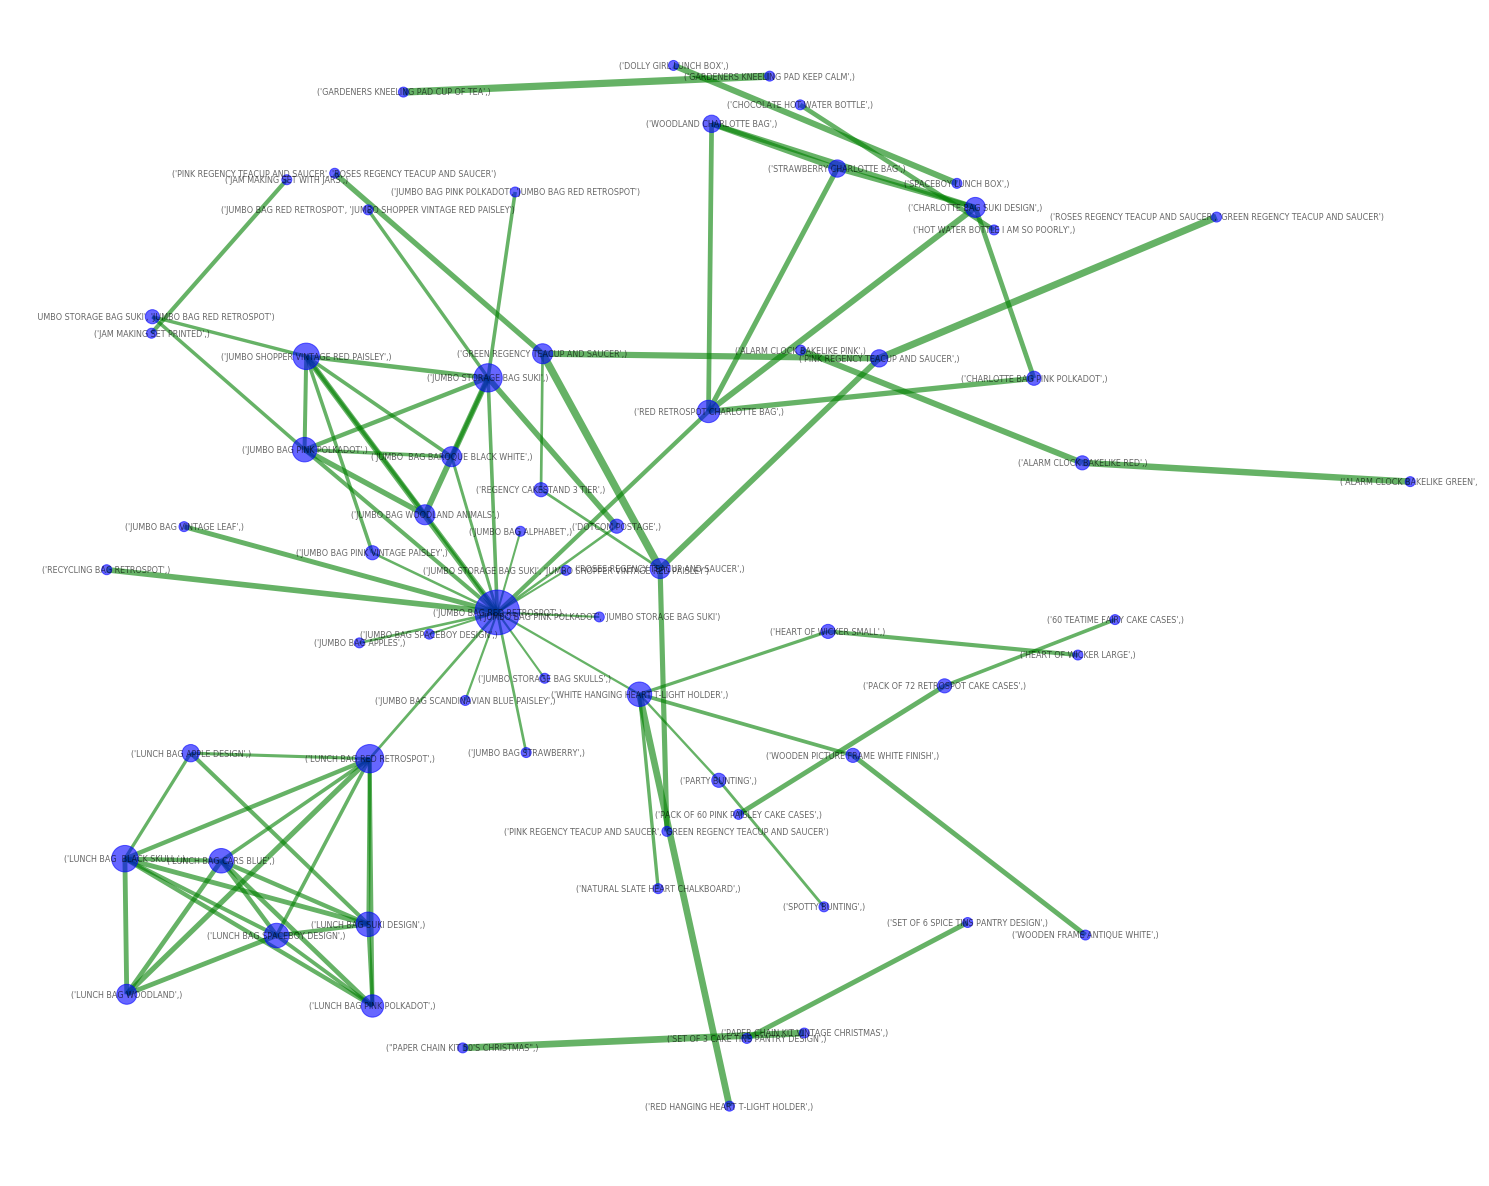

In [39]:
plt.figure(figsize =(20,16))
nx.draw_kamada_kawai(G, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list, width= edge_size_list)


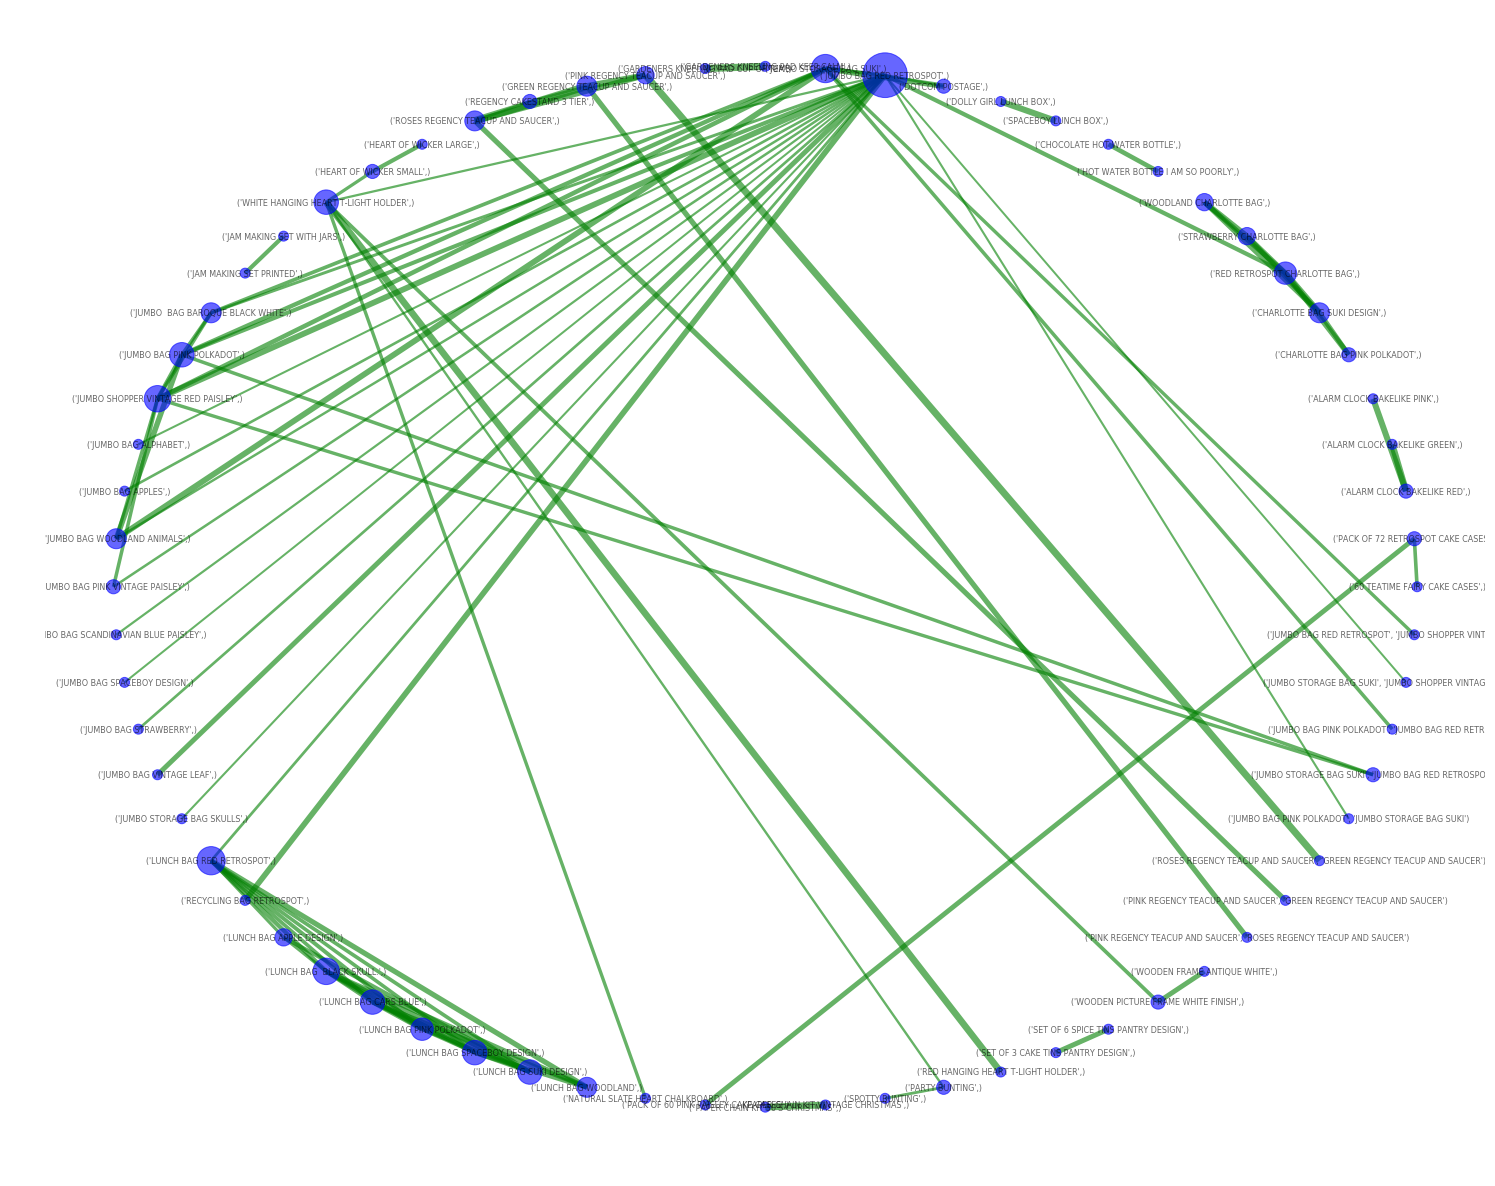

In [40]:
plt.figure(figsize =(20,16))
nx.draw_circular(G, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list, width= edge_size_list)

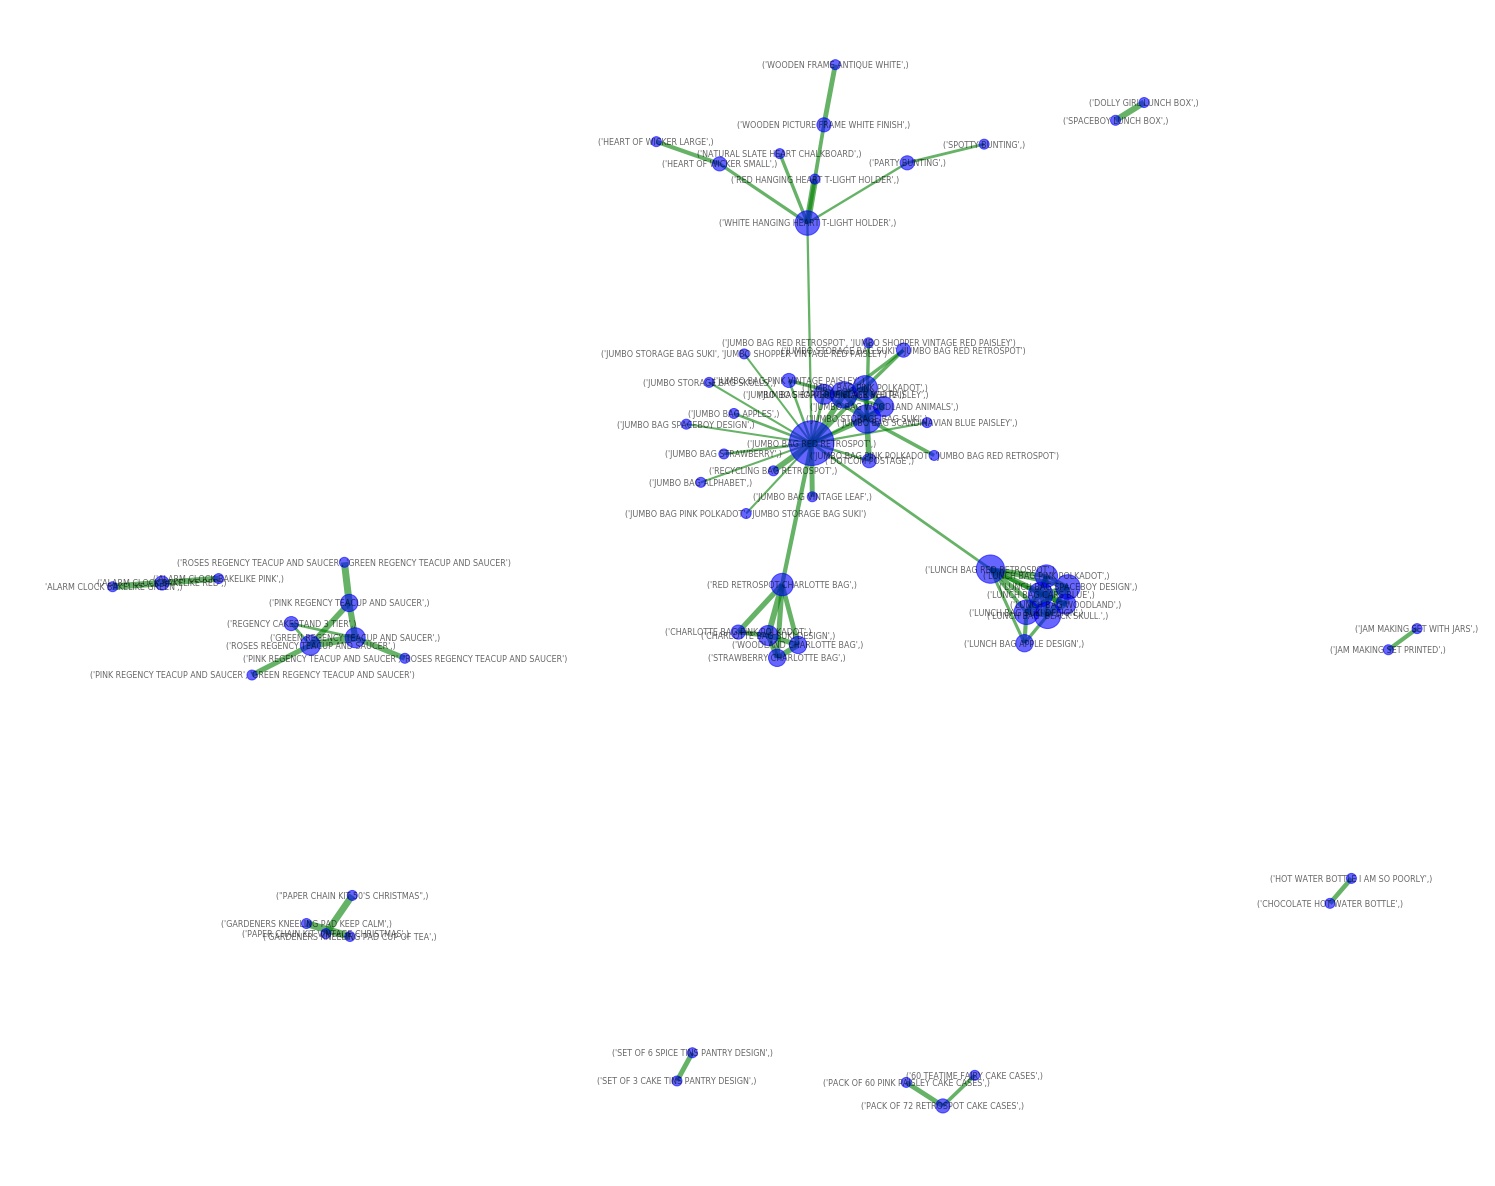

In [41]:
plt.figure(figsize =(20,16))
nx.draw_spring(G, with_labels=True, font_size=8, node_color='b',edge_color='g', alpha=0.6,\
                     node_size=node_size_list, width= edge_size_list)